<a href="https://colab.research.google.com/github/evandrocg/CDM/blob/master/brmalls_turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

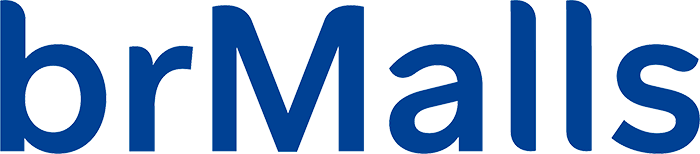

# <font color='Blue'>Gente & Gestão</font>

### <font color='GREY'> Predição de Turnover </font>  




#1° Problema de Negócio 

Todos os meses, novos colaboradores entram e saem da cia e para essa oscilação entre contratações e desligamentos, utilizamos o indicador de **TurnOver**. O objetivo deste modelo é realizar análise preditiva para este indicador.

##### **Fonte dos Dados**

Usaremos uma base de dados intitulada como "**brmalls_ml_colaborador.csv**", originada através da junção de 3 arquivos da **ADP** :
- Base de dados - colaborador
- Movimentação_função
- Movimentação_salarial
 

###### **Arquitetura dos Dados** (AD)

* **total_reajustes**:
* **media_variacao**:
* **menor_variacao**:
* **maior_variacao**',
* total_alocacoes_fisicas','
*total_areas','
*total_cargos','
*total_diretorias','
*total_empresas',
*total_funcoes','
*total_matriculas','
*total_movimentacoes','
*total_subareas','
*alocacao_fisica',
*area', '
*cargo', '
*centro_resultado', '
*codigo', '
*deficiente', '
*diretoria', '
*uf_endereco',
*estado_civil','
*funcao','
*grau_instrucao','
*nro_horas', '
*orientacao_sexual', '
*bolsa_estudos',
*filhos', '
*prazo_contrato', '
*primeiro_emprego','
*raca_cor','
*religiao','
*sexo','
*shopping',
*sub_area','
*vinculo','
*lideranca','
*tempo_empresa','
*idade','
*faixa_salarial','
*situacao_empregado'

# 2° Análise Exploratória dos Dados


In [3]:
# Importando Bibliotecas Essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

In [4]:
# Se conectando com os dados - Nesse caso, a Fonte de Dados é um 
df = pd.read_csv('/content/colaborador_ml_brmalls.csv', low_memory=False)

In [5]:
# Renomeando o nome das colunas
df.columns = [
'total_reajustes','media_variacao','menor_variacao','maior_variacao','total_alocacoes_fisicas',
'total_diretorias','total_empresas','total_funcoes','total_movimentacoes','alocacao_fisica',
'empresa','diretoria','endereco_uf','estado_civil','funcao_codigo','grau_de_instrucao',
'nro_de_horas','possui_filho','prazo_de_contrato','primeiro_emprego','sexo','shopping',
'vinculo_empregaticio','lideranca','tempo_de_empresa','faixa_etaria','faixa_salarial',
'status'
]

In [47]:
# Imprime na Tela os primeiros registros
df.head(10)

,total_reajustes,media_variacao,menor_variacao,maior_variacao,total_alocacoes_fisicas,total_diretorias,total_empresas,total_funcoes,total_movimentacoes,alocacao_fisica,empresa,diretoria,endereco_uf,estado_civil,funcao_codigo,grau_de_instrucao,nro_de_horas,possui_filho,prazo_de_contrato,primeiro_emprego,sexo,shopping,vinculo_empregaticio,lideranca,tempo_de_empresa,faixa_etaria,faixa_salarial,status
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,RJ,Outros,349,Analfabeto,220,Sim,Indeterminado,Não,Feminino,AMAZONAS,Trabalhador CLT,Não Líder,> 10,Até 19 anos,NaN,Demissão
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,RJ,Solteiro,19,Analfabeto,220,Não,Indeterminado,Não,Masculino,CAMPINAS,Trabalhador CLT,Não Líder,> 10,De 41 a 50 anos,NaN,Demissão
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,RJ,Solteiro,556,Analfabeto,220,Não,Indeterminado,Não,Masculino,CAMPINAS,Trabalhador CLT,Não Líder,> 10,De 41 a 50 anos,NaN,Demissão
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,RJ,Solteiro,1136,Analfabeto,220,Não,Indeterminado,Não,Feminino,CAMPINAS,Trabalhador CLT,Não Líder,> 10,De 41 a 50 anos,NaN,Demissão
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,MS,Solteiro,1074,Analfabeto,220,Não,Indeterminado,Não,Feminino,CAMPO GRANDE,Trabalhador CLT,Não Líder,5-10,De 20 a 30 anos,NaN,Demissão
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,MS,Solteiro,1074,Ensino Médio Completo,220,Não,Indeterminado,Não,Feminino,CAMPO GRANDE,Trabalhador CLT,Não Líder,5-10,De 20 a 30 anos,NaN,Demissão
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,MS,Casado,420,Ensino Fundamental Completo,220,Não,Indeterminado,Não,Feminino,CAMPO GRANDE,Trabalhador CLT,Não Líder,5-10,De 41 a 50 anos,NaN,Demissão
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,MS,Solteiro,420,Analfabeto,220,Não,Indeterminado,Não,Masculino,CAMPO GRANDE,Trabalhador CLT,Não Líder,5-10,De 20 a 30 anos,NaN,Demissão
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,MS,Solteiro,420,Ensino Médio Completo,220,Não,Indeterminado,Não,Masculino,CAMPO GRANDE,Trabalhador CLT,Não Líder,5-10,De 20 a 30 anos,NaN,Demissão
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,MS,Solteiro,420,Ensino Médio Incompleto,220,Não,Indeterminado,Não,Feminino,CAMPO GRANDE,Trabalhador CLT,Não Líder,5-10,De 31 a 40 anos,NaN,Demissão


In [48]:
# Informações do Dataset - Tipo das Variáveis, Quantidade de linhas (registros) e colunas (variáveis/features)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22364 entries, 0 to 22363
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_reajustes          22176 non-null  float64
 1   media_variacao           22176 non-null  float64
 2   menor_variacao           22176 non-null  float64
 3   maior_variacao           22176 non-null  float64
 4   total_alocacoes_fisicas  22234 non-null  float64
 5   total_diretorias         22234 non-null  float64
 6   total_empresas           22234 non-null  float64
 7   total_funcoes            22234 non-null  float64
 8   total_movimentacoes      22234 non-null  float64
 9   alocacao_fisica          5711 non-null   object 
 10  empresa                  22364 non-null  int64  
 11  diretoria                5711 non-null   object 
 12  endereco_uf              22363 non-null  object 
 13  estado_civil             22364 non-null  object 
 14  funcao_codigo         

In [49]:
#Verifica as dimensões do dataset (antes de vírgula são linhas    ,     depois da vírgula são colunas)
df.shape

(22364, 28)

In [50]:
# Cria uma função para imprimir na tela o resultado da função SHAPE
print(f"Dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.")

Dataset tem 22364 linhas e 28 colunas.


In [51]:
#Estatísticas descritivas das variáveis numéricas
df.describe()

,total_reajustes,media_variacao,menor_variacao,maior_variacao,total_alocacoes_fisicas,total_diretorias,total_empresas,total_funcoes,total_movimentacoes,empresa,funcao_codigo,nro_de_horas,faixa_salarial
count,22176.000000,2.217600e+04,22176.000000,2.217600e+04,22234.000000,22234.000000,22234.000000,22234.000000,22234.000000,22364.000000,22364.000000,22364.000000,22176.000000
mean,5.857323,2.101248e+04,-3.580874,9.348619e+04,1.181839,1.114329,1.545966,2.231267,2.776244,58.717850,5787.212216,211.037829,1.550280
std,6.973089,2.035892e+05,9.566636,7.794834e+05,0.531550,0.327963,1.046431,1.931877,2.785675,44.220631,8355.807640,21.889044,1.165725
min,1.000000,-3.057667e+01,-99.310000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,499.750000,220.000000,1.000000
50%,3.000000,3.062500e+00,0.000000,7.490000e+00,1.000000,1.000000,1.000000,1.000000,2.000000,54.000000,1074.000000,220.000000,1.000000
75%,8.000000,6.369226e+00,0.000000,2.632000e+01,1.000000,1.000000,2.000000,3.000000,3.000000,86.000000,3271.000000,220.000000,1.000000
max,97.000000,4.999950e+06,0.000000,9.999900e+06,6.000000,3.000000,12.000000,16.000000,30.000000,212.000000,20849.000000,220.000000,5.000000


In [52]:
# Tabela de Frequência da Variável "Situação do Empregado" - Nossa Classe ou Label ou Target
df['status'].value_counts()


Demissão                          18565
ATIVO                              1835
Cessão                             1809
Férias                               66
Auxilio Doença                       52
SUSPENSÃO CONTRATO DE TRABALHO       17
Licença Maternidade                  10
Licença Não Remunerada                4
Atestado Médico                       3
Recesso/Repouso                       1
Suspensão Contrato de Trabalho        1
Licença Remunerada                    1
Name: status, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


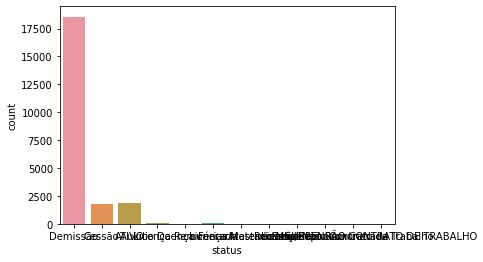

In [54]:
# Cria um gráfico de barras da variável Target
sns.countplot(df['status'])

In [55]:
# Procurando por valores  "missing"
df.isna().sum()

total_reajustes              188
media_variacao               188
menor_variacao               188
maior_variacao               188
total_alocacoes_fisicas      130
total_diretorias             130
total_empresas               130
total_funcoes                130
total_movimentacoes          130
alocacao_fisica            16653
empresa                        0
diretoria                  16653
endereco_uf                    1
estado_civil                   0
funcao_codigo                  0
grau_de_instrucao              0
nro_de_horas                   0
possui_filho                   0
prazo_de_contrato              0
primeiro_emprego               0
sexo                           0
shopping                    2376
vinculo_empregaticio           0
lideranca                      0
tempo_de_empresa               0
faixa_etaria                   0
faixa_salarial               188
status                         0
dtype: int64

In [6]:
#Eliminar a coluna de identificação, pois ela não é variável explicativa, é somente a identificação do cliente7
df = df.drop(columns=['diretoria', 'alocacao_fisica'])

In [57]:
#Printa o dataset na tela
dataset

,total_reajustes,media_variacao,menor_variacao,maior_variacao,total_alocacoes_fisicas,total_diretorias,total_empresas,total_funcoes,total_movimentacoes,empresa,endereco_uf,estado_civil,funcao_codigo,grau_de_instrucao,nro_de_horas,possui_filho,prazo_de_contrato,primeiro_emprego,sexo,shopping,vinculo_empregaticio,lideranca,tempo_de_empresa,faixa_etaria,faixa_salarial,status
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,RJ,Outros,349,Analfabeto,220,Sim,Indeterminado,Não,Feminino,AMAZONAS,Trabalhador CLT,Não Líder,> 10,Até 19 anos,NaN,Demissão
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,RJ,Solteiro,19,Analfabeto,220,Não,Indeterminado,Não,Masculino,CAMPINAS,Trabalhador CLT,Não Líder,> 10,De 41 a 50 anos,NaN,Demissão
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,RJ,Solteiro,556,Analfabeto,220,Não,Indeterminado,Não,Masculino,CAMPINAS,Trabalhador CLT,Não Líder,> 10,De 41 a 50 anos,NaN,Demissão
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,RJ,Solteiro,1136,Analfabeto,220,Não,Indeterminado,Não,Feminino,CAMPINAS,Trabalhador CLT,Não Líder,> 10,De 41 a 50 anos,NaN,Demissão
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,MS,Solteiro,1074,Analfabeto,220,Não,Indeterminado,Não,Feminino,CAMPO GRANDE,Trabalhador CLT,Não Líder,5-10,De 20 a 30 anos,NaN,Demissão
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22359,83.0,10.128434,-28.76,83.42,2.0,2.0,3.0,6.0,21.0,154,PR,Casado,20334,Ensino Médio Completo,180,Não,Indeterminado,Não,Feminino,CATUAI LONDRINA,Trabalhador CLT,Líder,> 10,De 41 a 50 anos,1.0,Cessão
22360,97.0,5.181856,-25.00,33.33,2.0,2.0,3.0,4.0,13.0,16,PR,Divorciado,1326,Ensino Médio Completo,220,Não,Indeterminado,Não,Feminino,CATUAI LONDRINA,Trabalhador CLT,Não Líder,> 10,De 41 a 50 anos,1.0,Demissão
22361,97.0,5.181856,-25.00,33.33,2.0,2.0,3.0,4.0,13.0,16,PR,Divorciado,20346,Ensino Médio Completo,180,Não,Indeterminado,Não,Feminino,CATUAI LONDRINA,Trabalhador CLT,Não Líder,> 10,De 41 a 50 anos,1.0,ATIVO
22362,97.0,5.181856,-25.00,33.33,2.0,2.0,3.0,4.0,13.0,17,PR,Divorciado,3269,Ensino Médio Completo,180,Não,Indeterminado,Não,Feminino,CATUAI LONDRINA,Trabalhador CLT,Não Líder,> 10,De 41 a 50 anos,1.0,Cessão


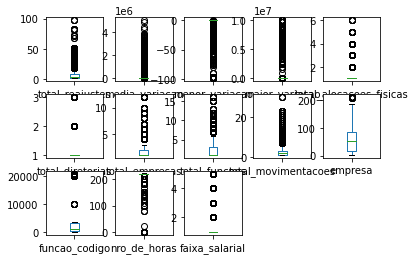

In [58]:
# Cria um gráfico tipo box and whisker plots (o famoso boxplot)
from matplotlib import pyplot
dataset.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False)
pyplot.show()

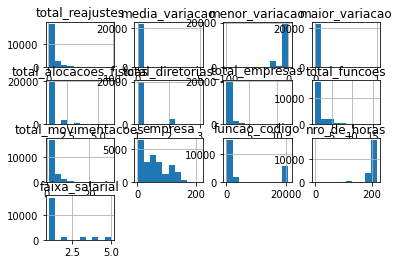

In [59]:
#cria um gráfico conhecido como histohrama
dataset.hist()
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

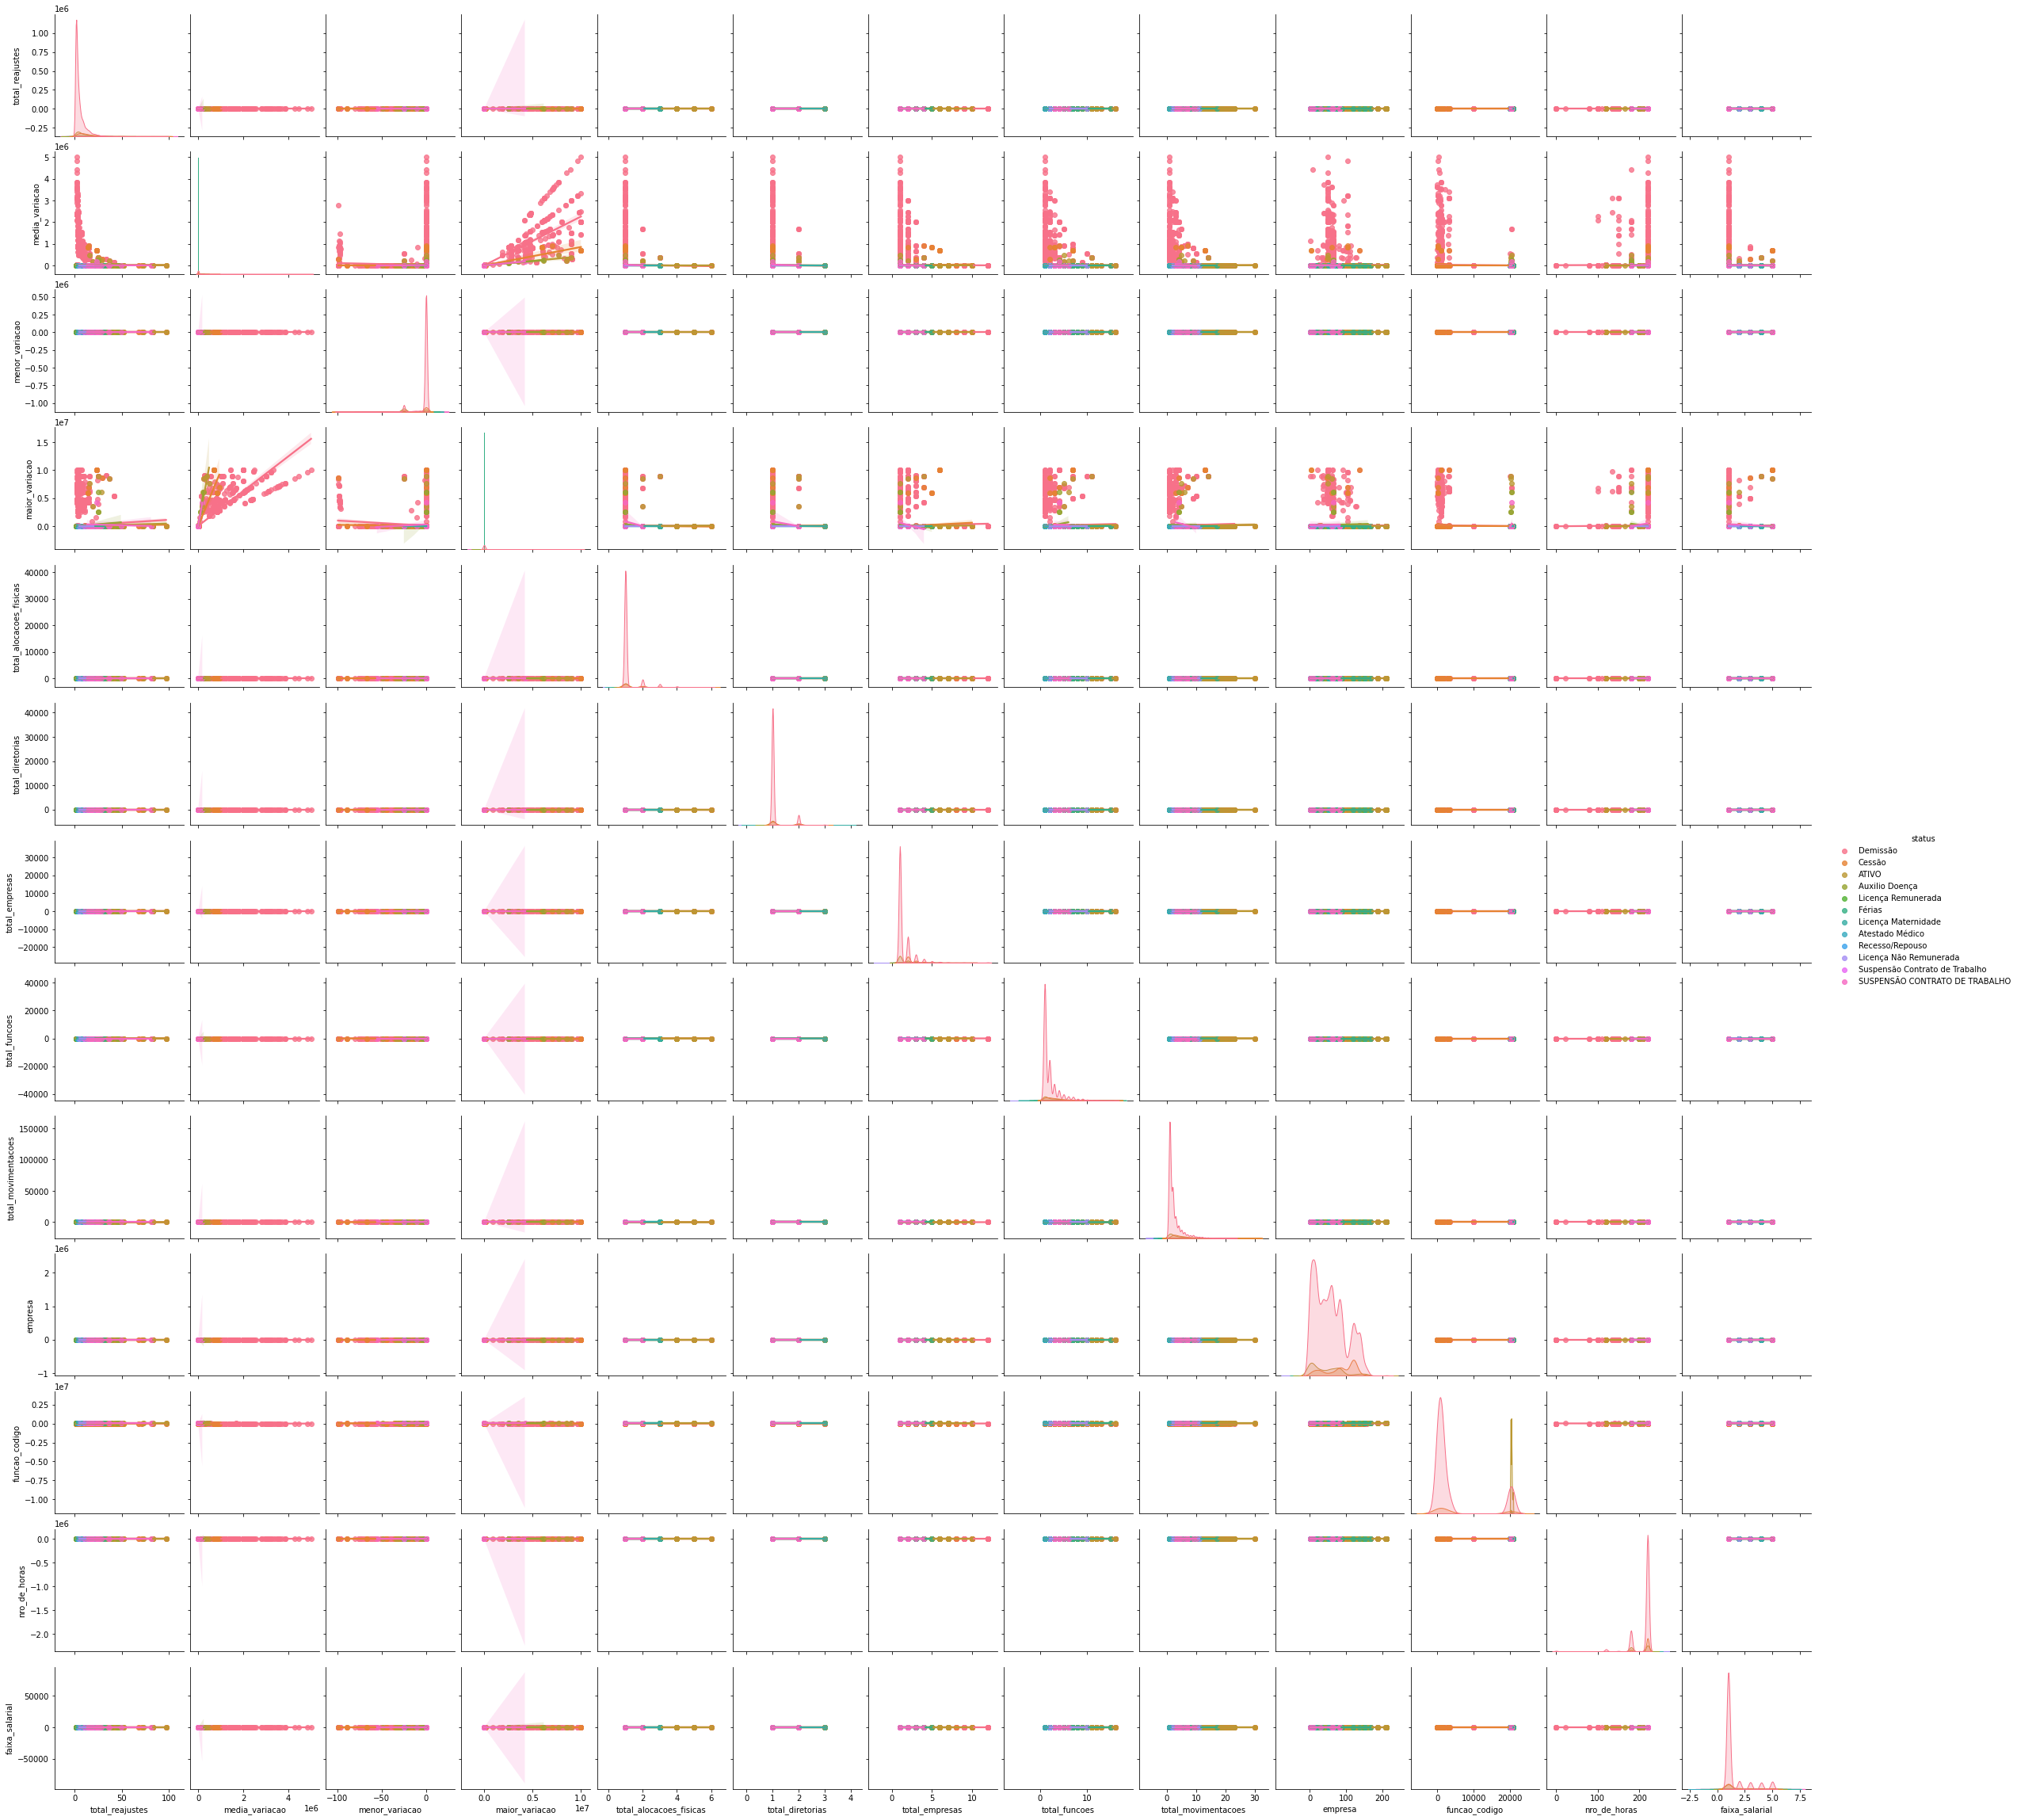

In [60]:
# Criação do Gráfico de dispersão (scatter) conhecido como pairplot
sns.pairplot(dataset, hue='status', kind="reg") # kind=reg é a reta de regressão

In [ ]:
# Criação do Gráfico de dispersão sem agregar pelo TARGET
sns.pairplot(df,kind="reg")

# 3° Pré-Processamento dos Dados

In [7]:
#3 Separando as Variáveis de Entrada e Saída do Modelo
X = df.iloc[:,:-1].values  #variáveis independentes
y = df.iloc[:,-1].values  #Target/labe/class/vairável dependente

In [9]:
#Print das variáveis X e Y
print("\nVariáveis de Entrada da avaliação:\n\n", X[:3])
print("\nstatus - Variável a ser Predita :\n\n", y[:3])


Variáveis de Entrada da avaliação:

 [[nan nan nan nan nan nan nan nan nan 5 'RJ' 'Outros' 349 'Analfabeto'
  220 'Sim' 'Indeterminado' 'Não' 'Feminino' 'AMAZONAS' 'Trabalhador CLT'
  'Não Líder' '> 10' 'Até 19 anos' nan]
 [nan nan nan nan nan nan nan nan nan 7 'RJ' 'Solteiro' 19 'Analfabeto'
  220 'Não' 'Indeterminado' 'Não' 'Masculino' 'CAMPINAS'
  'Trabalhador CLT' 'Não Líder' '> 10' 'De 41 a 50 anos' nan]
 [nan nan nan nan nan nan nan nan nan 7 'RJ' 'Solteiro' 556 'Analfabeto'
  220 'Não' 'Indeterminado' 'Não' 'Masculino' 'CAMPINAS'
  'Trabalhador CLT' 'Não Líder' '> 10' 'De 41 a 50 anos' nan]]

status - Variável a ser Predita :

 ['Demissão' 'Demissão' 'Demissão']


In [10]:
X

array([[nan, nan, nan, ..., '> 10', 'Até 19 anos', nan],
       [nan, nan, nan, ..., '> 10', 'De 41 a 50 anos', nan],
       [nan, nan, nan, ..., '> 10', 'De 41 a 50 anos', nan],
       ...,
       [97.0, 5.181855670103093, -25.0, ..., '> 10', 'De 41 a 50 anos',
        1.0],
       [97.0, 5.181855670103093, -25.0, ..., '> 10', 'De 41 a 50 anos',
        1.0],
       [97.0, 5.181855670103093, -25.0, ..., '> 10', 'De 41 a 50 anos',
        1.0]], dtype=object)

In [11]:
y

array(['Demissão', 'Demissão', 'Demissão', ..., 'ATIVO', 'Cessão',
       'Cessão'], dtype=object)

### Separando os dados entre Treino e Teste

In [12]:
#Divide o dataset em Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state = 7) 

In [13]:
print("Dados de Treino :\n----------------\n")
print("X = \n", X_train[:2])
print("y = \n", y_train[:2])

print("\n\nDados de Teste :\n----------------\n")
print("X = \n",X_test[:2])
print("y = \n", y_test[:2])

Dados de Treino :
----------------

X = 
 [[5.0 3.842 0.0 7.73 1.0 1.0 2.0 1.0 2.0 62 'RJ' 'Solteiro' 20117
  'Ensino Médio Completo' 220 'Não' 'Indeterminado' 'Não' 'Feminino'
  'PLAZA NITEROI' 'Trabalhador CLT' 'Não Líder' '2-5' 'De 20 a 30 anos'
  1.0]
 [6.0 11.428333333333335 0.0 33.58 1.0 1.0 1.0 4.0 4.0 1 'RJ' 'Solteiro'
  690 'Educação Superior' 220 'Não' 'Indeterminado' 'Não' 'Feminino'
  'BRMALLS' 'Trabalhador CLT' 'Não Líder' '5-10 ' 'De 31 a 40 anos' 3.0]]
y = 
 ['Cessão' 'Demissão']


Dados de Teste :
----------------

X = 
 [[7.0 4.0299999999999985 -25.0 33.33 1.0 1.0 2.0 2.0 2.0 118 'SP'
  'Solteiro' 20431 'Educação Superior Incompleto' 180 'Sim'
  'Indeterminado' 'Não' 'Feminino' 'SÃO BERNARDO' 'Estagiário'
  'Não Líder' '2-5' 'De 20 a 30 anos' 1.0]
 [3.0 1.3333333333333333 0.0 4.0 2.0 1.0 2.0 1.0 2.0 4 'SP' 'Casado'
  20025 'Pós Graduação' 220 'Não' 'Indeterminado' 'Não' 'Feminino' 'ABC'
  'Trabalhador CLT' 'Não Líder' '2-5' 'De 20 a 30 anos' 2.0]]
y = 
 ['Demissão' 'De

In [14]:
print(f"Shape dos dados de treino é {X_train.shape}")
print(f"Shape dos dados de teste é {X_test.shape}")

Shape dos dados de treino é (17891, 25)
Shape dos dados de teste é (4473, 25)


### Padronizando as Features - As variáveis explicativas (variáveis de entrada)


In [15]:
#Redimensionando os dados - PADRONIZAÇÂO - Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

print("\n--------------------------------\nDataset depois da padronização:\n--------------------------------\n", )

print("\nX_train :\n", X_train[:5])
print("-------------------------")
print("\nX_test :\n", X_test[:5])

ValueError: ignored

# 4° Modelo Preditivo

### 1° Versão do Modelo Preditivo: Criando um **baseline**



In [16]:
# Importando a Biblioteca KNN
from sklearn.neighbors import KNeighborsClassifier
Maquina_Preditiva = KNeighborsClassifier(n_neighbors=30) #[1,10,30,50]



In [17]:
#Treinando o Modelo preditivo com os dados de treino
Maquina_Preditiva = Maquina_Preditiva.fit(X_train,y_train)



ValueError: ignored

In [ ]:
#Fazendo novas Previsões com os dados de teste
y_pred = Maquina_Preditiva.predict(X_test)


print("\n---------------------------\n")
print("Valores Reais com dados de teste :\n",y_test)

print("\n---------------------------\n")
print("Valores Preditos com a Máquina Preditiva com dados de Teste :\n",y_pred)

In [ ]:
#Função que mostra os hyperparâmetros utilizados na construção do Modelo Preditivo 
Maquina_Preditiva.get_params

#5° Avaliando o Modelo Preditivo

In [ ]:
# Calculando a Acurácia
from sklearn import metrics
print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred)*100)

In [ ]:
# Comparando Real e Predito com dados de Teste
print("\nReal vs Predito \n------------------------------\n")
error_df = pd.DataFrame({"Real" : y_test,
                         "Predito" : y_pred})

error_df.head(5)

In [ ]:
#Usando a confusion matrix  e o classification report para avaliar a acurácia e demais indicadores
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

### 2° Versão do Modelo Preditivo: Modelo Definitivo 

In [ ]:
# Importando a Biblioteca do SVM
from sklearn.svm import SVC
classifier = SVC(kernel='linear',             # ['linear', 'rbf']
                 gamma= 1e-5  ,               # [1e-1, 1e-2, 1e-3, 1e-5]
                 C=10,                        # [10.0, 100.0, 1000.0, 10000.0]
                 random_state=7)




In [ ]:
#Treinando o Modelo com o SVC
classifier.fit(X_train,y_train)



In [ ]:
#Fazendo novas previsões com os dados de teste
y_pred = classifier.predict(X_test)

print("\n---------------------------\n")
print("Valores Preditos para Conjunto de Teste :\n",y_pred)
print("\n---------------------------\n")
print("Valores Atuais para Conjunto de Teste :\n",y_test)

In [ ]:
#Imprimindo os hyperparâmetros utilizados na criação do Modelo Preditivo Definitivo
classifier

In [ ]:
# Calculando a Acurácia do Modelo Preditivo
from sklearn import metrics
print("Acurácia da Predição = ", metrics.accuracy_score(y_test, y_pred))

# Comparando valores Reais com Preditos pelo Modelo
print("\nAtual vs Preditado  \n------------------------------\n")
error_df = pd.DataFrame({"Atual" : y_test,
                         "Preditado" : y_pred})

error_df.head(5)

In [ ]:

#Usando a confusion matrix e o classification report para avaliar o modelo
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)

In [ ]:
# Imprimindo a Confusion Matrix e o Classification Report
print(cm)
print(cr)